In [1]:
using MatrixProductBP
using JLD2, UnPack, Statistics
using Measurements
using Plots
using LaTeXStrings;

In [2]:
pgfplotsx();

In [3]:
Plots.default(
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 2,
    msc = :auto,
    size=(400,300),
)

In [4]:
myblue = theme_palette(:auto)[1];

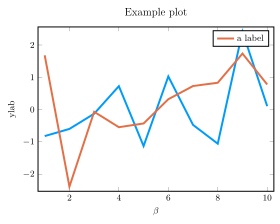

In [18]:
plot(randn(10), xlabel=L"\beta", ylabel="ylab", title="Example plot", size=(400,300))
plot!(randn(10), label="a label")

## Glauber RFIM

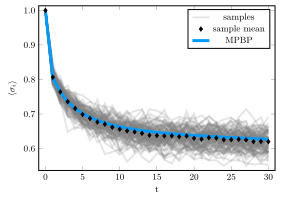

In [79]:
fn = "glauber_RFIM"
data = load("plot_data/"*fn*".jld2")
@unpack T, m, m_mc = data

pl = plot(0:T, m_mc, label=permutedims(["samples"; fill("", length(m_mc)-1)]), c=:gray, la=0.2)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=3, msc=:auto, st=:scatter)
plot!(pl, 0:T, m, lw=3, xlabel="t", ylabel=L"\langle\sigma_i\rangle", msc=:auto, c=myblue,
    xticks=0:5:T, ms=2, label="MPBP")

In [83]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber uniform J, Erdos-Renyi

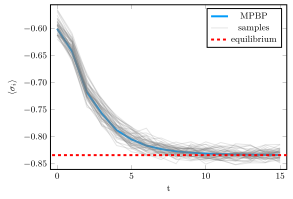

In [84]:
fn = "glauber_erdos_renyi"
data = load("plot_data/"*fn*".jld2")
@unpack T, m_mc, m_avg, m_std, m_eq = data

pl = plot(0:T, m_avg, #=ribbon=m_std,=# xlabel="t", ylabel=L"\langle\sigma_i\rangle", label="MPBP")
plot!(pl, 0:T, m_mc, label=permutedims(["samples"; fill("", length(m_mc)-1)]), c=:gray, la=0.2, lw=1)
hline!(pl, [-m_eq.val], label="equilibrium", c=:red, ls=:dash, lw=2)

In [85]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber uniform J, tilted at final time

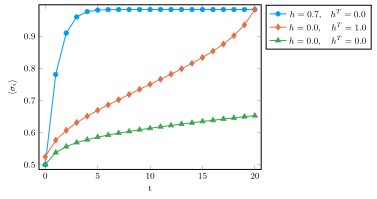

In [86]:
fn = "glauber_tilted"
data = load("plot_data/"*fn*".jld2")
@unpack T, magnetiz_free2, magnetiz_free, magnetiz_tilted = data

pl = plot(xlabel="t", ylabel=L"\langle\sigma_i\rangle", xticks=0:5:T, legend=:outertopright)
plot!(pl, 0:T, magnetiz_free2, m=:circle, label=L"h=0.7, \;\;\; h^T=0.0", ms=3, lw=1)
plot!(pl, 0:T, magnetiz_tilted, m=:diamond, label=L"h=0.0, \quad h^T=1.0", ms=4, lw=1)
plot!(pl, 0:T, magnetiz_free, m=:^, label=L"h=0.0, \quad h^T=0.0", ms=4, lw=1)

In [87]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber uniform J on infinite 8-regular graph

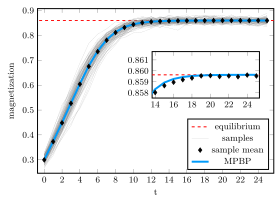

In [17]:
fn = "glauber_infinite8RRG_smallbeta"
data = load("plot_data/"*fn*".jld2")
@unpack T, k, m_mc, m, m_eq = data

pl = hline([m_eq], c=:red, ls=:dash, lw=1, label="equilibrium")
plot!(pl, 0:T, sample(m_mc, 10^2), label=permutedims(["samples"; fill("", 10^2-1)]), 
    c=:gray, la=1, lw=0.1)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=3, msc=:auto, st=:scatter)
pl = plot!(pl, 0:T, m, xlabel="t", ylabel="magnetization", label="MPBP",
    xticks=0:2:T, ms=3, 
    legend=:bottomright, c=myblue, lw=2)

ylims = m_eq .+ 2e-3 .* (-1,1)
plot!(pl, xticks=14:2:T, ylims=ylims, xlims=(14,T),
    inset=(1, bbox(0.4, 0.2, 0.55, 0.45)), subplot=2)
hline!(pl[2], [m_eq], c=:red, ls=:dash, lw=1, label="")
plot!(pl[2], 0:T, mean(m_mc), c=:black, m=:diamond, ms=3, msc=:auto, label="", st=:scatter)
plot!(pl[2], 0:T, m, ylabel="", label="", ms=3, msc=:auto, widen=true, c=myblue, lw=2)

In [18]:
savefig(pl, "plot_outputs/"*fn*".pdf");

## SIS karate club network

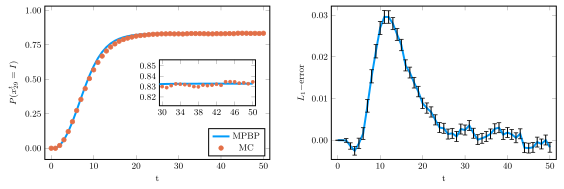

In [97]:
fn = "sis_karate_club_network"
data = load("plot_data/"*fn*".jld2")
@unpack T, ΔT, p29_bp, p29_mc, c, λ, ρ, svd_trunc = data

pl = plot(xlabel="t", xticks=0:10:T, ylabel=L"P(x_{29}^t=I)", ylims=(-0.05,1), legend=:bottomright)
plot!(pl, 0:ΔT:T, p29_bp, label="MPBP")
plot!(pl, 0:ΔT:T, getfield.(p29_mc, :val), ms=3, label="MC", st=:scatter)
ylims = extrema((p29_bp[end], p29_mc[end].val)) .+ (-1, 1) .* 0.02
plot!(pl, xticks=T-20:4:T, ylims=ylims, xlims=(T-20,T),
    inset=(1, bbox(0.4, 0.25, 0.55, 0.5)), subplot=2)
plot!(pl[2], 0:ΔT:T, p29_bp, label="")
plot!(pl[2], 0:ΔT:T, getfield.(p29_mc, :val), ms=2, label="", st=:scatter)

pl_err = plot(xlabel="t", xticks=0:10:T)
plot!(pl_err, 0:ΔT:T, p29_bp.-p29_mc, label="", ylabel=L"L_1 \rm{-error}", msc=:black)

plot(pl, pl_err, size=(800,300), margin=3Plots.mm)

In [98]:
savefig(pl, "plot_outputs/"*fn*".pdf");